In [1637]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [1638]:
# Download latest version
path = kagglehub.dataset_download("ihormuliar/starbucks-customer-data")

print("Path to dataset files:", path)

# portfolio.csv
portfolio_df = pd.read_csv(path + "/portfolio.csv")

# profile.csv
profile_df = pd.read_csv(path + "/profile.csv")

# transcript.csv
transcript_df = pd.read_csv(path + "/transcript.csv")

Path to dataset files: /Users/Isa/.cache/kagglehub/datasets/ihormuliar/starbucks-customer-data/versions/1


## Lets Take a look at portfolio:

In [1639]:
portfolio_df.head(10)

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [1640]:
#making a short name for the offer ids
portfolio_df['short_id'] = portfolio_df['id'].str[:5]

Now lets look for missing values:

In [1641]:
print(portfolio_df['channels'].value_counts())
print ('shape:', portfolio_df.shape)

channels
['web', 'email', 'mobile', 'social']    4
['web', 'email', 'mobile']              3
['email', 'mobile', 'social']           2
['web', 'email']                        1
Name: count, dtype: int64
shape: (10, 8)


I see there are no missing values and the dataframe is pretty small. Lets do some EDA

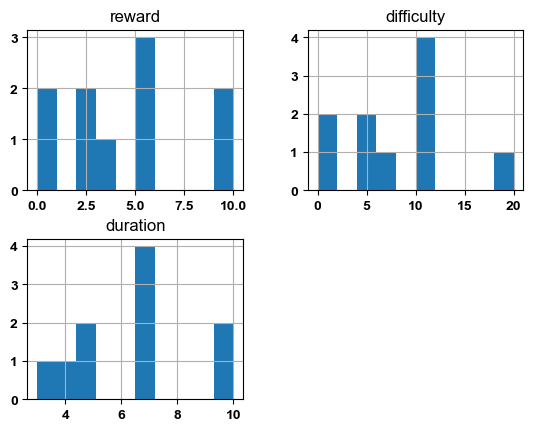

In [1642]:
portfolio_df.drop(columns = ['Unnamed: 0'], inplace = True)
portfolio_df.hist()
plt.show()

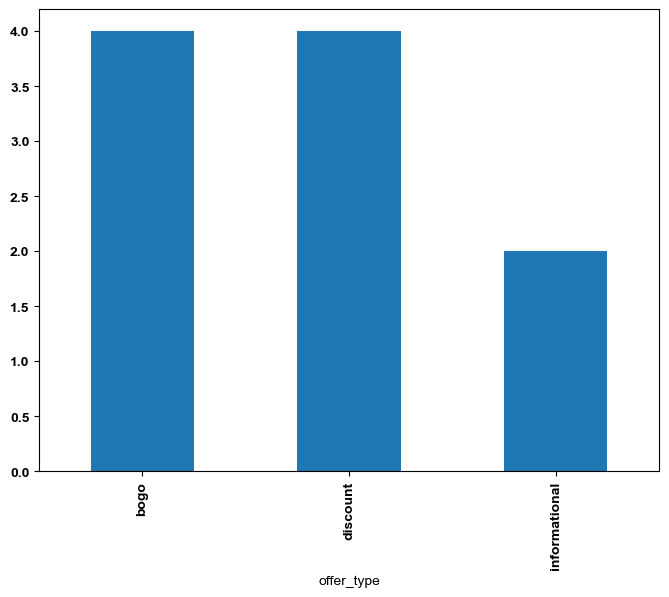

In [1643]:
discount_counts = portfolio_df['offer_type'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
discount_counts.plot(kind='bar')
plt.show()

In [1644]:
portfolio_df.rename(columns={'id': 'offer_id'}, inplace=True)

In [1645]:
#cleaning the channel column:

channel_types = ['email', 'mobile', 'social', 'web']
for channel in channel_types:
    portfolio_df[f"{channel}_channel"] = 0  

# Iterating through each row and assign 1 if the channel exists
for index, row in portfolio_df.iterrows():
    for channel in channel_types:
        if channel in row['channels']:
            portfolio_df.at[index, f"{channel}_channel"] = 1

In [1646]:
portfolio_df.drop(columns = ['channels'], inplace = True)
portfolio_df.head(10)

,reward,difficulty,duration,offer_type,offer_id,short_id,email_channel,mobile_channel,social_channel,web_channel
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,ae264,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,4d5c5,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,3f207,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,9b98b,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,0b1e1,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,2298d,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,fafdc,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,5a8bc,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,f1942,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,2906b,1,1,0,1


## Lets take a look at profile:

In [1647]:
profile_df.head(10)

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
5,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
6,6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
8,8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
9,9,NaN,118,8974fc5686fe429db53ddde067b88302,20161122,NaN


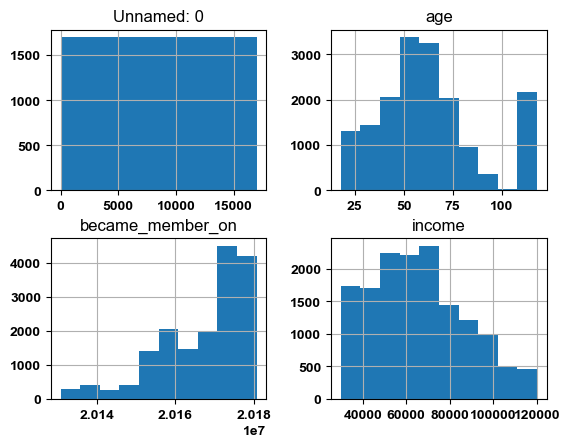

In [1648]:
profile_df.hist()
plt.show()

In [1649]:
profile_df.drop(columns = ['Unnamed: 0'], inplace = True)
profile_df.rename(columns={'id': 'person_id'}, inplace=True)
print (profile_df.shape)
nan_counts = profile_df.isna().sum()
print("NaNs per column:\n", nan_counts)

(17000, 5)
NaNs per column:
 gender              2175
age                    0
person_id              0
became_member_on       0
income              2175
dtype: int64


just from the first 10 rows I am seeing this pattern where gender is Na so is income, so I take a deeper look using this handy little library:

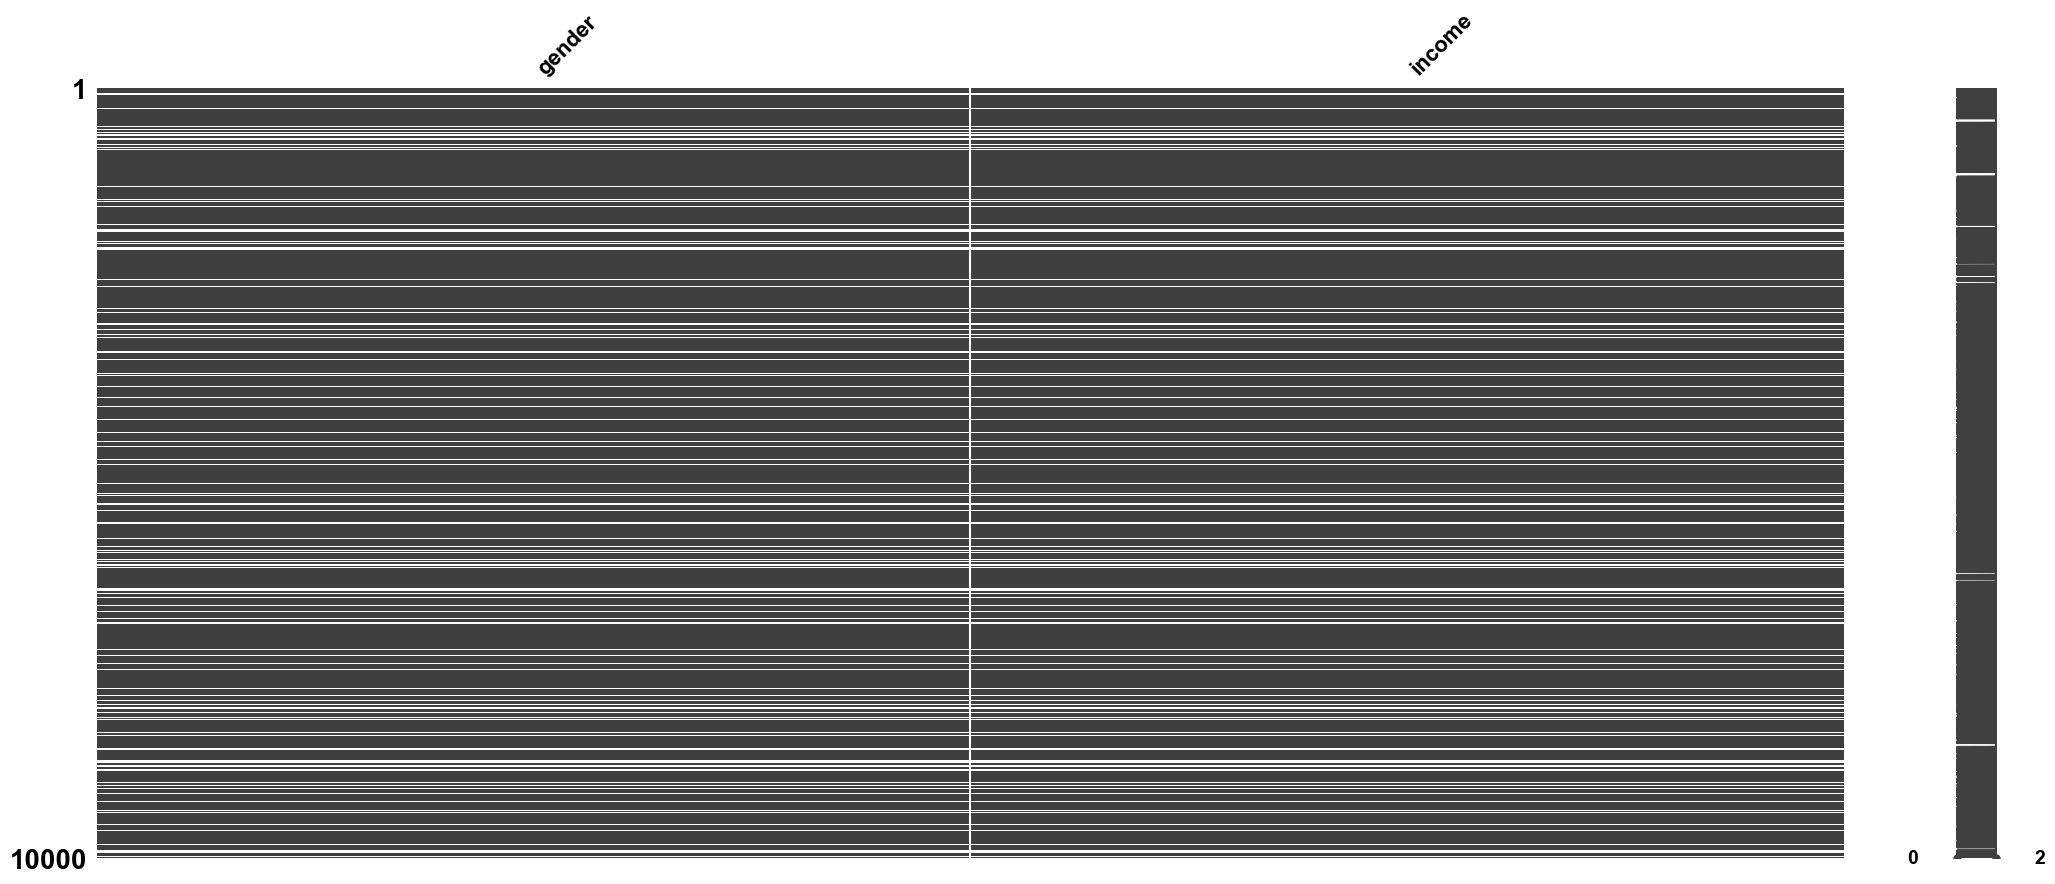

In [1650]:
#!pip install missingno
import missingno as msno
temp = profile_df[['gender', 'income']]
%matplotlib inline
msno.matrix(temp.sample(10000))
plt.show()

The patterns look so similar, I also notice that every time these rows have NaNs then age is 118, so let me verify

In [1651]:
subset =  profile_df[profile_df['age'] == 118]

In [1652]:
subset.head(10)
print(subset['age'].value_counts(dropna = False))
print(subset['income'].value_counts(dropna = False))
print(subset['gender'].value_counts(dropna = False))

age
118    2175
Name: count, dtype: int64
income
NaN    2175
Name: count, dtype: int64
gender
NaN    2175
Name: count, dtype: int64


as you can see the data is missing or unreliable for all the same rows. its 2175 of 17000 so we could either impute the data/use missingness as a feature or drop it. Im gonna do both just to see what happens and how imputation or dropping changes results, just because Im a little lost on what best practice is. 

In [1653]:
profile_cleaned = profile_df.dropna().reset_index(drop=True)

In [1654]:
profile_cleaned.head(10)

,gender,age,person_id,became_member_on,income
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
5,F,61,aa4862eba776480b8bb9c68455b8c2e1,20170911,57000.0
6,M,26,e12aeaf2d47d42479ea1c4ac3d8286c6,20140213,46000.0
7,F,62,31dda685af34476cad5bc968bdb01c53,20160211,71000.0
8,M,49,62cf5e10845442329191fc246e7bcea3,20141113,52000.0
9,M,57,6445de3b47274c759400cd68131d91b4,20171231,42000.0


In [1655]:
from datetime import datetime 
profile_cleaned['became_member_on'] = pd.to_datetime(profile_cleaned['became_member_on'], format='%Y%m%d')
today = pd.to_datetime(datetime.today())
profile_cleaned['tenure_years'] = (today - profile_cleaned['became_member_on']).dt.days / 365

# Optional: Round to a certain decimal if needed
profile_cleaned['tenure_years'] = profile_cleaned['tenure_years'].astype(int)

In [1656]:
profile_cleaned.head(10)

,gender,age,person_id,became_member_on,income,tenure_years
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,7
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,7
2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,6
3,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,6
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,6
5,F,61,aa4862eba776480b8bb9c68455b8c2e1,2017-09-11,57000.0,7
6,M,26,e12aeaf2d47d42479ea1c4ac3d8286c6,2014-02-13,46000.0,10
7,F,62,31dda685af34476cad5bc968bdb01c53,2016-02-11,71000.0,8
8,M,49,62cf5e10845442329191fc246e7bcea3,2014-11-13,52000.0,9
9,M,57,6445de3b47274c759400cd68131d91b4,2017-12-31,42000.0,6


In [1657]:
print('mean:', profile_cleaned['income'].mean())
print('median:', profile_cleaned['income'].median())
print('mode:', profile_cleaned['income'].mode())
print('max:',profile_cleaned['income'].max())
print('min:', profile_cleaned['income'].min())

mean: 65404.9915682968
median: 64000.0
mode: 0    73000.0
Name: income, dtype: float64
max: 120000.0
min: 30000.0


In [1658]:
print('min date:', profile_cleaned['became_member_on'].min())
print('max date:', profile_cleaned['became_member_on'].max())

min date: 2013-07-29 00:00:00
max date: 2018-07-26 00:00:00


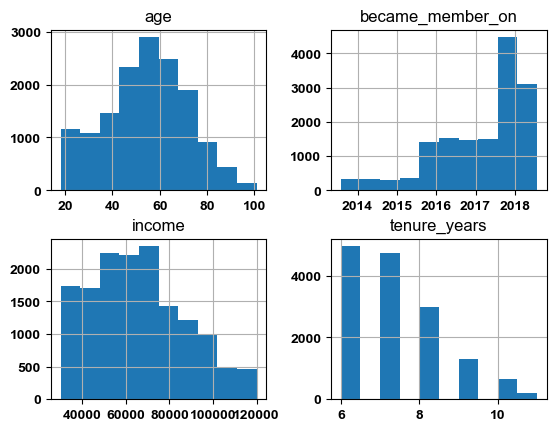

In [1659]:
profile_cleaned.hist()
plt.show()

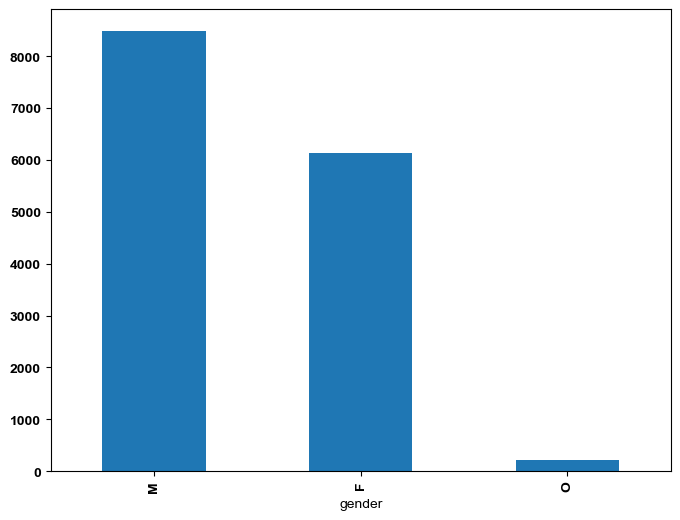

In [1660]:
gender_counts = profile_cleaned['gender'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.show()

I see a pretty normal distribution for age after dropping the 118s, became member on is skewed to the right, and income to the left.

## Now Transcripts!

I start by dropping the unnamed column

In [1661]:
transcript_df.drop(columns = ['Unnamed: 0'], inplace = True)
transcript_df.head(20)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
6,c4863c7985cf408faee930f111475da3,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
9,31dda685af34476cad5bc968bdb01c53,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


Checking for Nas as well as looking at the count of each event

In [1662]:
nan_counts = transcript_df.isna().sum()
print("NaNs per column:\n", nan_counts)

NaNs per column:
 person    0
event     0
value     0
time      0
dtype: int64


In [1663]:
transcript_df['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

This time variable was interesting to me since the max is 714 hours which means each customer was only sent offers for about 30 days since the beginning of their membership (according to kaggle 0 means the beginning of their tenure)

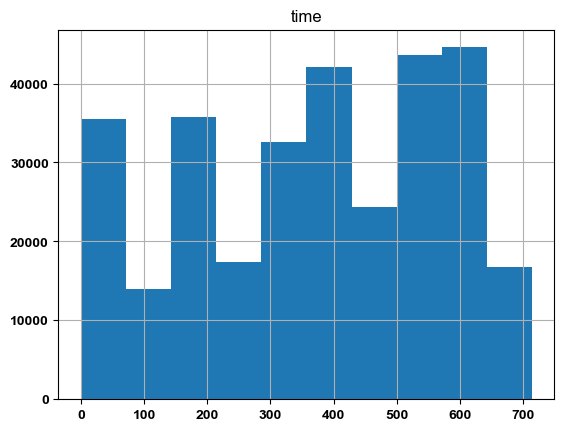

In [1664]:
transcript_df.hist()
plt.show()

In [1665]:
h['time'].max()

714

In [1666]:
print (transcript_df.shape)

(306534, 4)


I wanna take a look at the dataframe by person to see what Im dealing with, I notice value has offer information and transaction information, it seems like the only way to associate a transaction to an offer is if an offer is completed, the transaction happens at the same time

In [1667]:
h = transcript_df.sort_values(by=['person', 'time'])

I use a regular expression to get just the offer id or transaction amount, I wanna learn more about regular expressions, this was a little hard for me:

In [1668]:
h.loc[h['event'] == 'offer completed', 'value'] = h.loc[h['event'] == 'offer completed', 'value'].str.replace(r",\s?'reward':\s?\d+", '', regex=True)
h['value'] = h['value'].str.extract(r":\s?'?([^'}]+)'?\s?}")[0]

In [1669]:
pd.set_option('display.max_colwidth', None)
h.head(10)

,person,event,value,time
55972,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,168
77705,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,192
89291,0009655768c64bdeb2e877511632db8f,transaction,22.16,228
113605,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,336
139992,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,372
153401,0009655768c64bdeb2e877511632db8f,offer received,f19421c1d4aa40978ebb69ca19b0e20d,408
168412,0009655768c64bdeb2e877511632db8f,transaction,8.57,414
168413,0009655768c64bdeb2e877511632db8f,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,414
187554,0009655768c64bdeb2e877511632db8f,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,456
204340,0009655768c64bdeb2e877511632db8f,offer received,fafdcd668e3743c1bb461111dcafc2a4,504


Here I create a cumulartive transaction count thats shifted one back so its the cumulative up until that row, then I separate the dataframes because If im focusing on offer success and I dont have too much information on transactions, I only keep the cumulative and then for visualization purposes the amount of a transaction if its associated with an offer. 

In [1670]:
h['transaction_flag'] = (h['event'] == 'transaction').astype(int)

h['cumulative_transaction_count'] = h.groupby('person')['transaction_flag'].cumsum().shift(1).fillna(0).astype(int)
h = h.drop(columns=['transaction_flag'])

In [1671]:
# Creating df with only transactions
tran = h[h['event'] == 'transaction'].copy()
tran.rename(columns={'value': 'transaction_amount'}, inplace=True)

# Creating df with all other events
other = h[h['event'] != 'transaction'].copy()
other.rename(columns={'value': 'offer_id'}, inplace=True)

In [1672]:
# Merging the other_events_df with the transactions_df on 'person' and 'time'
merged_df = other.merge(tran[['person', 'time', 'transaction_amount']], on=['person', 'time'], how='left')

# Creating the 'transaction_amount' column:
merged_df['transaction_amount'] = merged_df['transaction_amount'].fillna(0.0)

In [1673]:
merged_df.head(10)

,person,event,offer_id,time,cumulative_transaction_count,transaction_amount
0,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,168,0,0.0
1,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,192,0,0.0
2,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,336,1,0.0
3,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,372,1,0.0
4,0009655768c64bdeb2e877511632db8f,offer received,f19421c1d4aa40978ebb69ca19b0e20d,408,1,0.0
5,0009655768c64bdeb2e877511632db8f,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,414,2,8.57
6,0009655768c64bdeb2e877511632db8f,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,456,2,0.0
7,0009655768c64bdeb2e877511632db8f,offer received,fafdcd668e3743c1bb461111dcafc2a4,504,2,0.0
8,0009655768c64bdeb2e877511632db8f,offer completed,fafdcd668e3743c1bb461111dcafc2a4,528,3,14.11
9,0009655768c64bdeb2e877511632db8f,offer viewed,fafdcd668e3743c1bb461111dcafc2a4,540,3,0.0


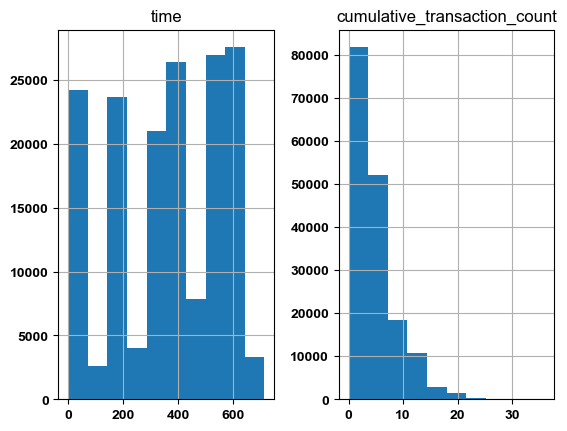

In [1674]:
merged_df.hist()
plt.show()

Time is not very normal and transactions are on the lower side.

## Merging Dataframes:

Now I wanna merge all my dataframes to have an exportable dataframe for analysis in powerbi

In [1675]:
merged_df.rename(columns={'person': 'person_id'}, inplace=True)
part_one = merged_df.merge(profile_cleaned, on='person_id', how='left')
final_df = part_one.merge(portfolio_df, on ='offer_id', how = 'left')

In [1676]:
final_df.head(10)

,person_id,event,offer_id,time,cumulative_transaction_count,transaction_amount,gender,age,became_member_on,income,tenure_years,reward,difficulty,duration,offer_type,short_id,email_channel,mobile_channel,social_channel,web_channel
0,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,168,0,0.0,M,33.0,2017-04-21,72000.0,7.0,0,0,3,informational,5a8bc,1,1,1,0
1,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,192,0,0.0,M,33.0,2017-04-21,72000.0,7.0,0,0,3,informational,5a8bc,1,1,1,0
2,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,336,1,0.0,M,33.0,2017-04-21,72000.0,7.0,0,0,4,informational,3f207,1,1,0,1
3,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,372,1,0.0,M,33.0,2017-04-21,72000.0,7.0,0,0,4,informational,3f207,1,1,0,1
4,0009655768c64bdeb2e877511632db8f,offer received,f19421c1d4aa40978ebb69ca19b0e20d,408,1,0.0,M,33.0,2017-04-21,72000.0,7.0,5,5,5,bogo,f1942,1,1,1,1
5,0009655768c64bdeb2e877511632db8f,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,414,2,8.57,M,33.0,2017-04-21,72000.0,7.0,5,5,5,bogo,f1942,1,1,1,1
6,0009655768c64bdeb2e877511632db8f,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,456,2,0.0,M,33.0,2017-04-21,72000.0,7.0,5,5,5,bogo,f1942,1,1,1,1
7,0009655768c64bdeb2e877511632db8f,offer received,fafdcd668e3743c1bb461111dcafc2a4,504,2,0.0,M,33.0,2017-04-21,72000.0,7.0,2,10,10,discount,fafdc,1,1,1,1
8,0009655768c64bdeb2e877511632db8f,offer completed,fafdcd668e3743c1bb461111dcafc2a4,528,3,14.11,M,33.0,2017-04-21,72000.0,7.0,2,10,10,discount,fafdc,1,1,1,1
9,0009655768c64bdeb2e877511632db8f,offer viewed,fafdcd668e3743c1bb461111dcafc2a4,540,3,0.0,M,33.0,2017-04-21,72000.0,7.0,2,10,10,discount,fafdc,1,1,1,1


I wanted to include data on the time it took from receiving an offer to completing and viewing, but I notice that many offers are viewed after their completed so I dont think viewing is a good tell of offer performance. I only include received to completed time for our analysis.

In [1677]:
final_df = final_df.dropna().reset_index(drop=True)
final_df['time_between_offers'] = final_df[final_df['event'] == 'offer received'].groupby('person_id')['time'].diff()

I wanted to see how the time between receiving an offer, viewing it and completing it. At first I had different combinations of times, but I saw that many offers were viewed after being completed, so it didnt make sense to include them. Just for the analysis I included the difference between the time an offer was received and completed if it was completed.

In [1678]:
#idk if i wanna add this to the analysis to show something related to time
def calculate_time_diffs(group):
    # Extract times for each event
    received_time = group.loc[group['event'] == 'offer received', 'time'].iloc[0] if 'offer received' in group['event'].values else np.nan
    viewed_time = group.loc[group['event'] == 'offer viewed', 'time'].iloc[0] if 'offer viewed' in group['event'].values else np.nan
    completed_time = group.loc[group['event'] == 'offer completed', 'time'].iloc[0] if 'offer completed' in group['event'].values else np.nan
    
    # Calculating time differences
    
    received_to_completed = completed_time - received_time if not np.isnan(received_time) and not np.isnan(completed_time) else np.nan
    
    # Assign these values to every row in the group
    group = group.assign(
        received_to_completed=received_to_completed
    )
    
    return group

# Apply the function on each group
final_df = final_df.groupby(['person_id', 'offer_id'], group_keys=False).apply(calculate_time_diffs).reset_index(drop=True) 

/var/folders/tw/5l80rd1x70948506zjnxlm880000gp/T/ipykernel_25624/1520131767.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby(['person_id', 'offer_id'], group_keys=False).apply(calculate_time_diffs).reset_index(drop=True)


In [1679]:
final_df.head(10)
final_df.to_csv('starbucks_analysis.csv', index=False)

In [1680]:
print(event_counts)

event     offer received  offer viewed  offer completed
short_id                                               
0b1e1               6726          2215             3386
2298d               6655          6379             4886
2906b               6631          3460             3911
3f207               6657          3487                0
4d5c5               6593          6329             3310
5a8bc               6643          5873                0
9b98b               6685          3499             4188
ae264               6683          5901             3657
f1942               6576          6310             4103
fafdc               6652          6407             5003


I wanted to include one helpful visual which shows the relationship between offers sent, viewed and completed.

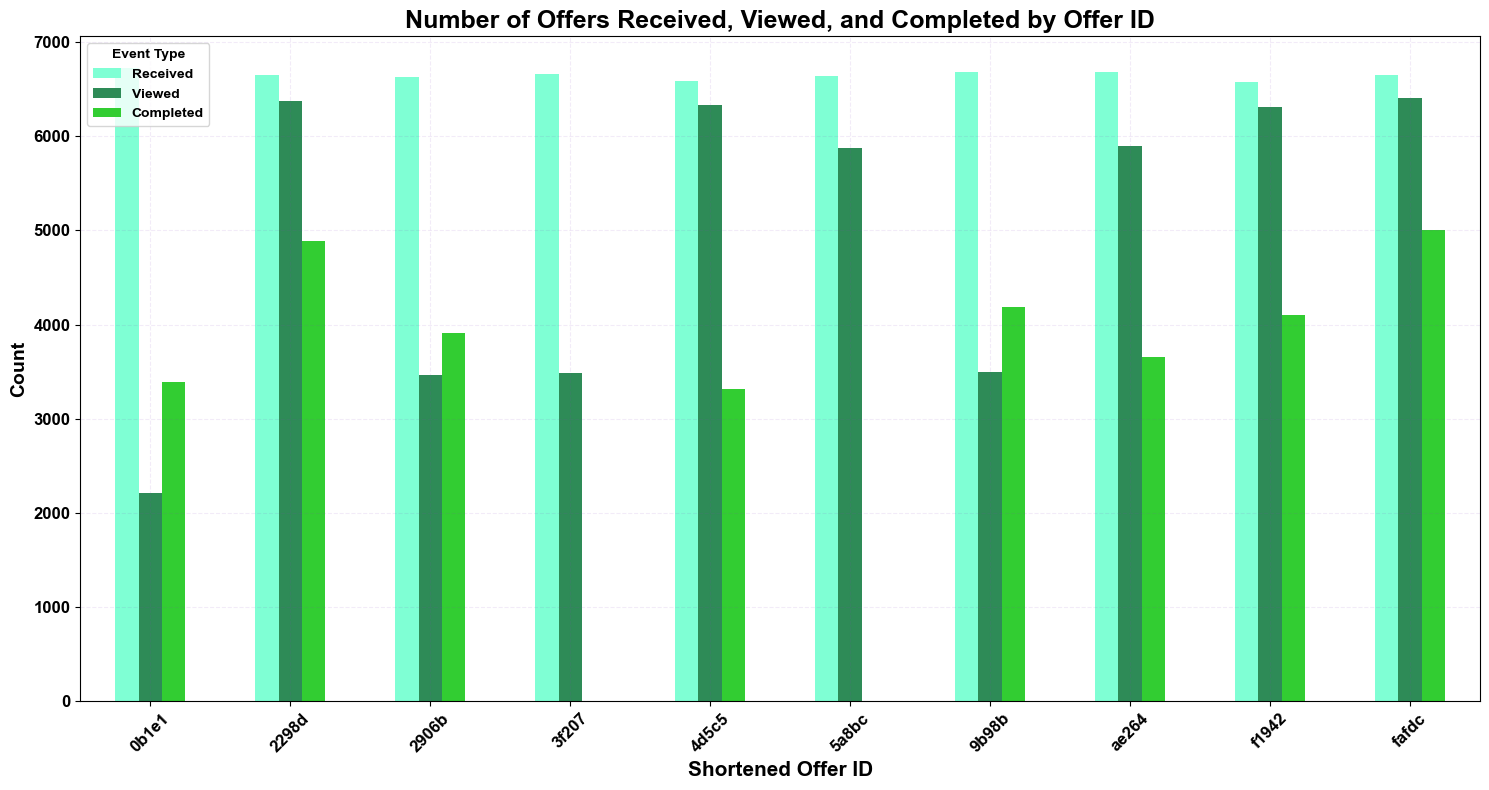

In [1681]:
event_counts = final_df.groupby(['short_id', 'event']).size().unstack(fill_value=0)
event_counts = event_counts[['offer received', 'offer viewed', 'offer completed']]

plt.rcParams['font.family'] = ['Arial']


green_colors = ['#7FFFD4', '#2E8B57', '#32CD32']
event_counts.plot(kind='bar', figsize=(15, 8), color =green_colors)


plt.title('Number of Offers Received, Viewed, and Completed by Offer ID', fontsize = 18, fontweight='bold')
plt.xlabel('Shortened Offer ID', fontsize = 15, fontweight='bold')
plt.ylabel('Count', fontsize = 14, fontweight='bold')
plt.yticks(fontsize = 12)
plt.xticks(rotation=45, fontsize = 12)  # Rotate x-axis labels for readability
plt.legend(title='Event Type', labels=['Received', 'Viewed', 'Completed'])


plt.tight_layout()
plt.grid(True, color = '#8844bb',linestyle='--', alpha = 0.1)
plt.show()

## Predicting if a customer will complete an offer:

Here I engineer the data more, creating dummy variables for categorical columns, bins for age columns, then I group the dataframe in a way that includes just one row with dummy variables for the event type. I fill NaN time between offers with -1 to indicate that its the first offer sent.

In [1682]:
new_df = final_df.copy()

In [1683]:
new_df = pd.concat([new_df, pd.get_dummies(final_df['offer_type'], prefix='offer', dtype=int)], axis=1)
new_df = pd.concat([new_df, pd.get_dummies(final_df['gender'], prefix='gender', dtype=int)], axis=1)
new_df = pd.concat([new_df, pd.get_dummies(final_df['event'], prefix='event', dtype=int)], axis=1)

In [1684]:
bins = [0, 18, 35, 50, 100]  # Modify the upper limit as needed
labels = ['0-18', '19-35', '36-50', '51+']
new_df['age_group'] = pd.cut(new_df['age'], bins=bins, labels=labels, right=False)
new_df = pd.concat([new_df, pd.get_dummies(new_df['age_group'], prefix='age_group:', dtype=int)], axis=1)

In [1685]:
new_df.drop(columns = ['offer_type', 'gender', 'event', 'became_member_on', 'transaction_amount', 'time', 'age', 'age_group', 'received_to_completed'], inplace = True)

In [1686]:
new_df = new_df.groupby(['person_id', 'offer_id'], as_index=False).max()

In [1687]:
new_df['time_between_offers'] = new_df['time_between_offers'].fillna(-1) 

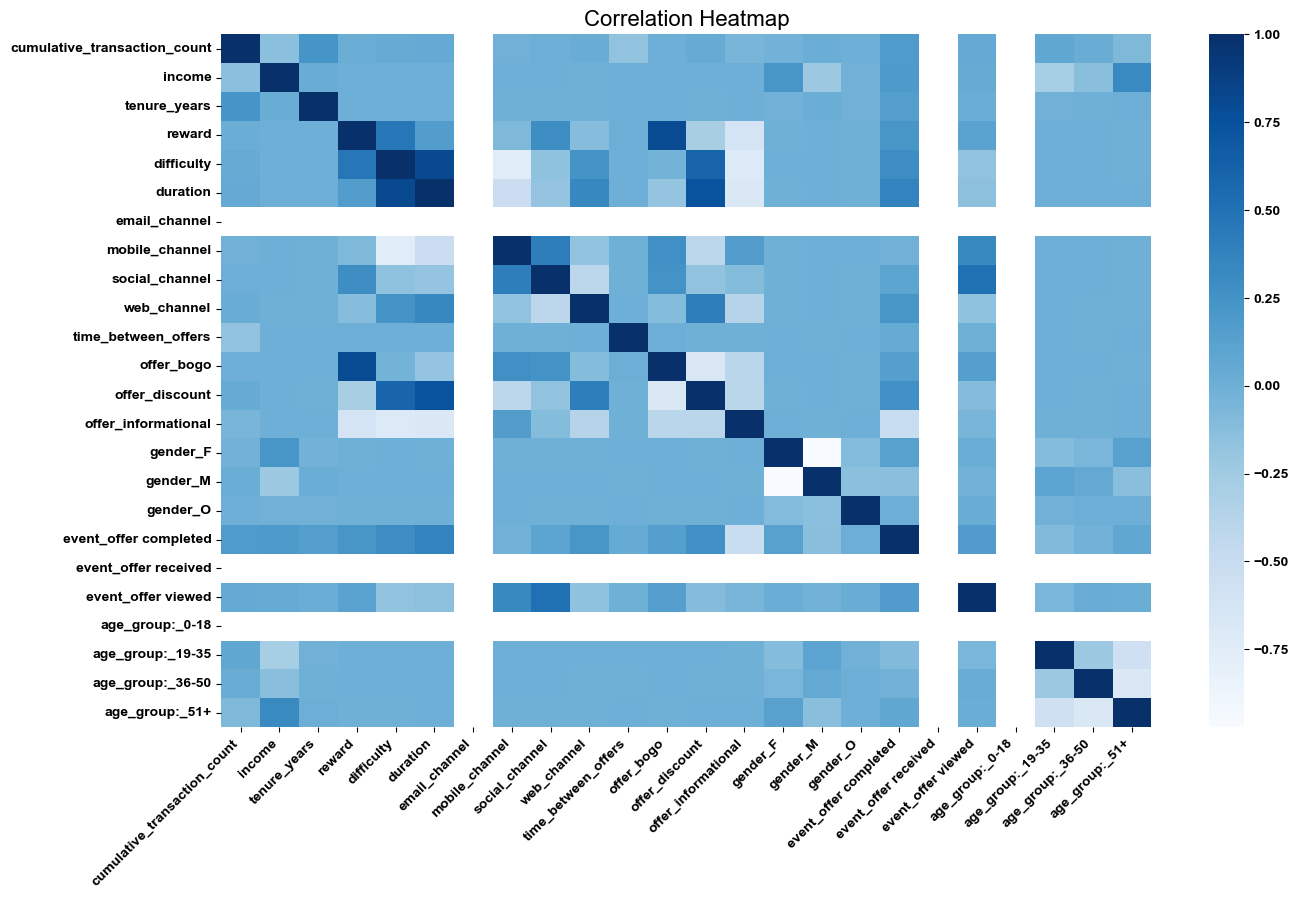

In [1688]:
import seaborn as sns

numeric_df = new_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 9))


sns.heatmap(corr_matrix, cmap="Blues", annot=False, cbar=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Doesnt seem to be too much of a linear relationship between my variables. I run a randomforest classifier which is good at detecting non linear relationships, this time I just run the classifier

In [1689]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Assuming df is your finalized DataFrame with all features and target variable 'event_offer completed'


X = new_df.drop(columns=['event_offer completed', 'person_id', 'offer_id', 'short_id'])  # Drop any non-predictive columns
y = new_df['event_offer completed']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability for ROC AUC


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8002716161158896
Precision: 0.7833947104117844
Recall: 0.8369098712446352
F1 Score: 0.8092685457375065
ROC AUC Score: 0.8852017907219635
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      5453
           1       0.78      0.84      0.81      5592

    accuracy                           0.80     11045
   macro avg       0.80      0.80      0.80     11045
weighted avg       0.80      0.80      0.80     11045



I see its performing well but I wanna make sure im not overfitting, so I rerun the model using crossvalidation as well as gridsearch to optimize hyperparameters.

In [1690]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer

# with cross validation and gridsearch

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#model
model = RandomForestClassifier(random_state=42)

#parameters
param_grid = {
    'n_estimators': [40, 90, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

#k fold cross val
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=skf,
    scoring=scoring,
    refit='roc_auc',  # This will make GridSearchCV use 'roc_auc' to choose the best model
    n_jobs=-1,
    verbose=2
)

# Perform the grid search
grid_search.fit(X_scaled, y)

#best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best Parameters:', best_params)
print('Best Scores (based on ROC AUC):')
for metric in scoring.keys():
    print(f"{metric.capitalize()} (mean across folds): {grid_search.cv_results_[f'mean_test_{metric}'][grid_search.best_index_]:.4f}")

# Retrain the best model on the full training set if needed
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/Users/Isa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/Users/Isa/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Best Scores (based on ROC AUC):
Accuracy (mean across folds): 0.8222
Precision (mean across folds): 0.7913
Recall (mean across folds): 0.8810
Roc_auc (mean across folds): 0.9033
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=  10.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   4.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=  15.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=  17.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   5.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_e

Even with crossvalidation, the model is performing well. I test for different metrics because accuracy isnt enough, especially if we're focusing on predicting positives, who is likely to complete an offer, its good to look at recall and f1.

## Clustering Segmentation

I really wanted to do clustering but I did not have time, since i would have to restructure the data 